方針\
$X$エラーについては、$p=[5\times10^{-2},10^{-1}]$を補完して、$p=10^{-4},5\times10^{-4}$を求める。
その後、符合距離の関数として求め直す。
$Z$エラーについては、$p=10^{-4},5\times10^{-4}$から、符合距離の関数として求め直す。

# d1=3

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

## Xエラー

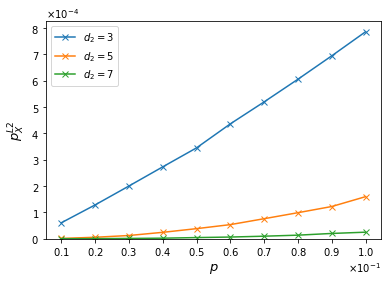

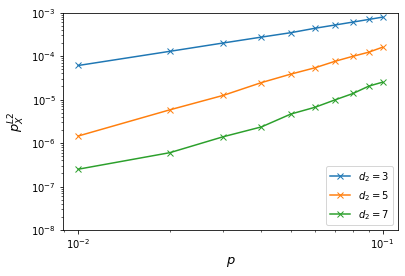

In [137]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 0.001)
ax.legend()

### 線形回帰

d2= 3
katamuki= [1.17769105]
seppen= -1.92608262310134
p(10^{-4})= [2.30756088e-07] 

p(5*10^{-4})= [1.5357619e-06] 

d2= 5
katamuki= [2.04166537]
seppen= -1.7647675363740096
p(10^{-4})= [1.17103802e-10] 

p(5*10^{-4})= [3.13064516e-09] 

d2= 7
katamuki= [2.50279217]
seppen= -2.099479500695383
p(10^{-4})= [7.75089455e-13] 

p(5*10^{-4})= [4.35239679e-11] 



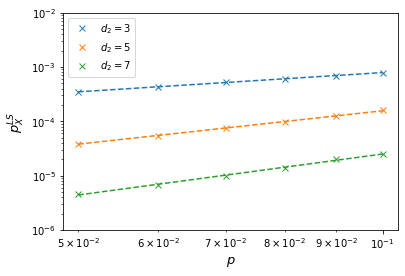

In [138]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
data2 = data2.iloc[:,4:]
code_distance_list = data2.index
p_list = data2.columns
a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("d2=", str(2*i+3))
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]),"\n")
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        print("d2=", str(2*i+3))
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]),"\n")
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
#print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.01)
ax.legend()

[0.05456331] [0.04477759]
[0.01878442] [0.03935095]


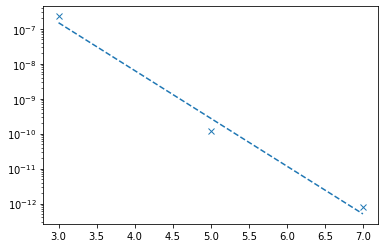

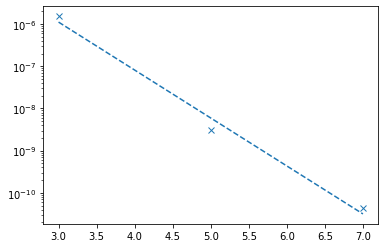

In [90]:
# p=10^{-4}
fig, ax = plt.subplots()
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([2.30756088e-07,1.17103802e-10,7.75089455e-13])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.plot([3,5,7], [2.30756088e-07,1.17103802e-10,7.75089455e-13],marker='x',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots()
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([1.5357619e-06,3.13064516e-09,4.35239679e-11])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [1.5357619e-06,3.13064516e-09,4.35239679e-11],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}

### Zエラー

$Z$エラーについては、直接サンプリングによって得られた結果を用いることにする。
→もっと精度を高めて計算すべきかも

In [164]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

"""
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10e-7, 1)
ax.legend()
"""

'\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{L(\rm{S})}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))\nax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))\nax.set_xticks(a)\nax.legend()\n\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)-1):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{LS}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="

hokan= [0.00149154] 

hokan= [7.79812862e-05] 

hokan= [4.1856083e-06] 

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001 ] [1.49525682e+09 1.49650994e+09 1.49776411e+09 1.49901934e+09
 1.50027561e+09 1.50153294e+09 1.50279133e+09 1.50405076e+09
 1.50531126e+09 1.50657281e+09]


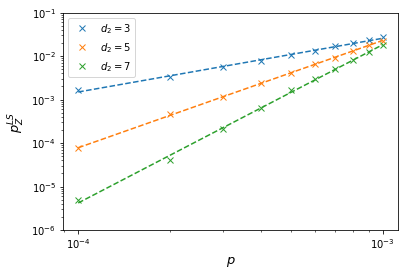

In [166]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.1)
ax.legend()

[0.00180831] [0.50234795]
[0.00025285] [0.06708755]


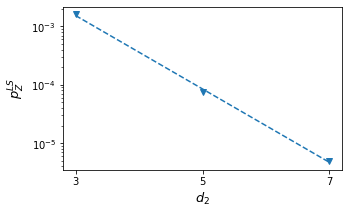

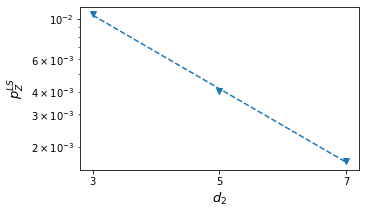

In [163]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], [data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]],marker='v',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]],marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

# d1 = 5

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

### Xエラー

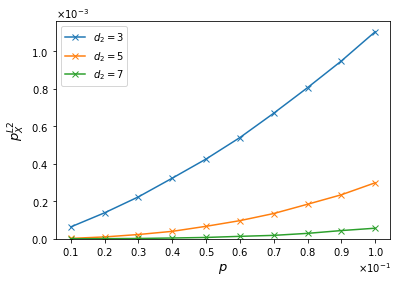

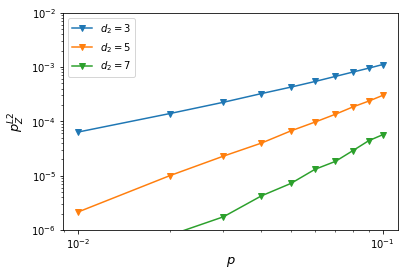

In [129]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
data2 = data2.iloc[:,:]
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.01)
ax.legend()

### 線形回帰

d2= 3
p(10^{-4})= [1.92295124e-07]
p(5*10^{-4})= [1.42716447e-06] 

d2= 5
p(10^{-4})= [1.21599558e-10]
p(5*10^{-4})= [3.72937024e-09] 

d2= 7
p(10^{-4})= [9.18349019e-14]
p(5*10^{-4})= [1.03291819e-11] 



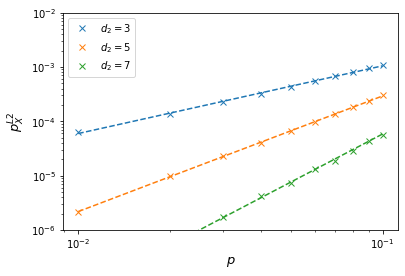

In [130]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("d2=", str(2*i+3))
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]))
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        print("d2=", str(2*i+3))
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]))
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
#print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.01)
ax.legend()

[0.11229161] [0.10989773]
[0.03084576] [0.07580947]


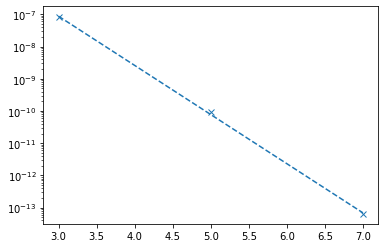

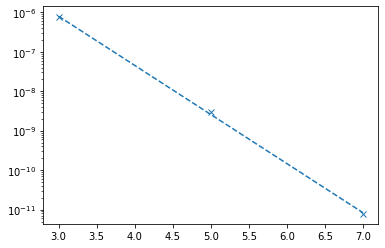

In [101]:
# p=10^{-4}
fig, ax = plt.subplots()
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([8.06662949e-08,9.06046899e-11,6.39731109e-14])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.plot([3,5,7], [8.06662949e-08,9.06046899e-11,6.39731109e-14],marker='x',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots()
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([7.4107661e-07,2.98590658e-09,7.78883094e-12])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [7.4107661e-07,2.98590658e-09,7.78883094e-12],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}

### Zエラー

In [167]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

"""
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*5+6+7)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
"""

'\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'x\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{L(\rm{S})}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))\nax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))\nax.set_xticks(a)\nax.legend()\n\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)-1):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\n    print(code_distance_list[i]*(4*5+6+7)/b[0])\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{LS}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter

hokan= [0.00172468]
hokan= [0.00018922]
hokan= [2.0532703e-05]
[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001 ] [6.11271222e+09 6.11780719e+09 6.12290641e+09 6.12800988e+09
 6.13311761e+09 6.13822959e+09 6.14334583e+09 6.14846634e+09
 6.15359111e+09 6.15872016e+09]


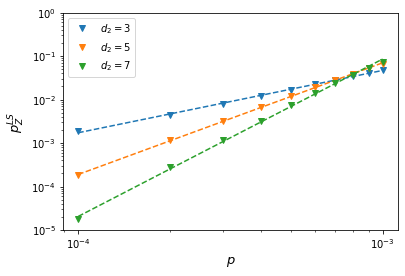

In [169]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]))
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]))
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

[0.00104471] [0.20738354]
[0.00014826] [0.03727704]


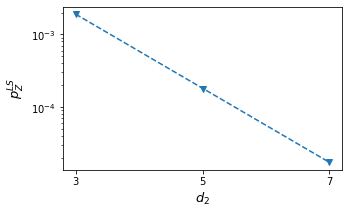

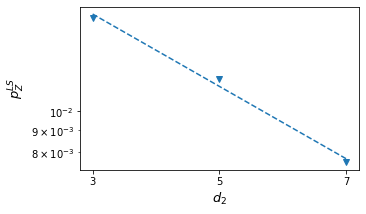

In [160]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], [data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]],marker='v',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]],marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

# d1 = 7

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

### Xエラー

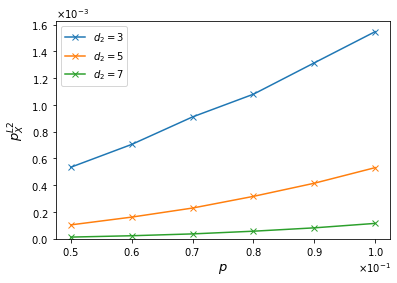

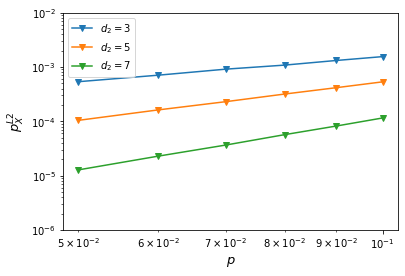

In [106]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
data2 = data2.iloc[:,4:]

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.01)
ax.legend()

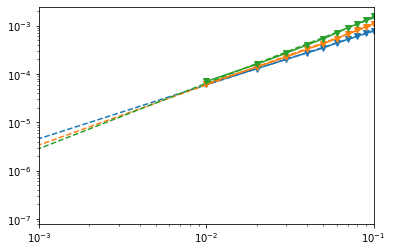

In [128]:
fig, ax = plt.subplots()

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
#data2 = data2.iloc[:,4:]
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####
a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)
b = np.array(data2.loc[code_distance_list[0]])
X = np.log10(a).reshape(-1, 1)
Y = np.log10(b)
clf.fit(X, Y)
ax.plot([10**(-4),10**(-1)], 10**clf.predict(np.log10([10**(-4),10**(-1)]).reshape(-1, 1)),marker='',color=cm(0),linestyle="dashed")
ax.plot(a, b,marker='v')

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
#data2 = data2.iloc[:,4:]
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####
a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)
b = np.array(data2.loc[code_distance_list[0]])
X = np.log10(a).reshape(-1, 1)
Y = np.log10(b)
clf.fit(X, Y)
ax.plot([10**(-4),10**(-1)], 10**clf.predict(np.log10([10**(-4),10**(-1)]).reshape(-1, 1)),marker='',color=cm(1),linestyle="dashed")
ax.plot(a, b,marker='v')

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
#data2 = data2.iloc[:,4:]
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####
a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)
b = np.array(data2.loc[code_distance_list[0]])
X = np.log10(a).reshape(-1, 1)
Y = np.log10(b)
clf.fit(X, Y)
ax.plot([10**(-4),10**(-1)], 10**clf.predict(np.log10([10**(-4),10**(-1)]).reshape(-1, 1)),marker='',color=cm(2),linestyle="dashed")
ax.plot(a, b,marker='v')

ax.set_xlim(10**(-3), 10**(-1))
#ax.set_ylim(0.000001, 0.01)
ax.set_xscale("log")
ax.set_yscale("log")

### 線形回帰

d2= 3
p(10^{-4})= [4.04551548e-08]
p(5*10^{-4})= [4.72464756e-07] 

d2= 5
p(10^{-4})= [4.80690674e-11]
p(5*10^{-4})= [2.10464447e-09] 

d2= 7
p(10^{-4})= [3.5721434e-14]
p(5*10^{-4})= [5.8586619e-12] 



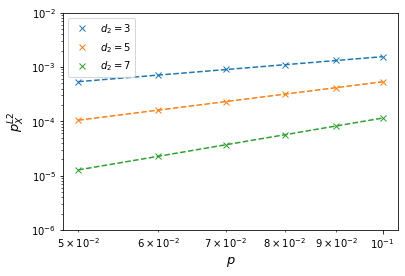

In [107]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("d2=", str(2*i+3))
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]))
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        print("d2=", str(2*i+3))
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]))
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
#print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.01)
ax.legend()

[0.10641981] [0.04954391]
[0.02839785] [0.0412071]


AttributeError: 'numpy.ndarray' object has no attribute 'set_xticks'

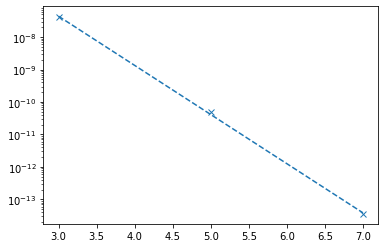

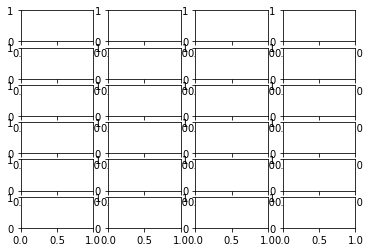

In [140]:
# p=10^{-4}
fig, ax = plt.subplots()
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([4.04551548e-08,4.80690674e-11,3.5721434e-14])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.plot([3,5,7], [4.04551548e-08,4.80690674e-11,3.5721434e-14],marker='x',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots()
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([4.72464756e-07,2.10464447e-09,5.8586619e-12])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xticks([3,5,7])
ax.set_xticklabels([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [4.72464756e-07,2.10464447e-09,5.8586619e-12],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

### Zエラー

44155.84415584607
422360.24844720494
3661538.4615384596


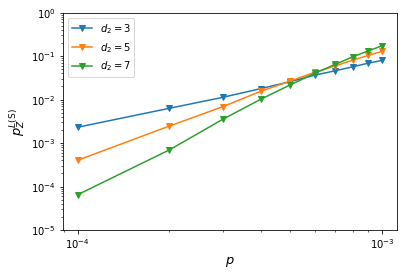

In [116]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

"""
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()
"""

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*7+6)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

katamuki= [1.43260046]
seppen= 2.967109522901205
hokan= [0.00172468] 

katamuki= [2.56707076]
seppen= 6.5452494744216345
hokan= [0.00018922] 

katamuki= [3.6183565]
seppen= 9.785872114518005
hokan= [2.0532703e-05] 

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001 ] [6.11271222e+09 6.11780719e+09 6.12290641e+09 6.12800988e+09
 6.13311761e+09 6.13822959e+09 6.14334583e+09 6.14846634e+09
 6.15359111e+09 6.15872016e+09]


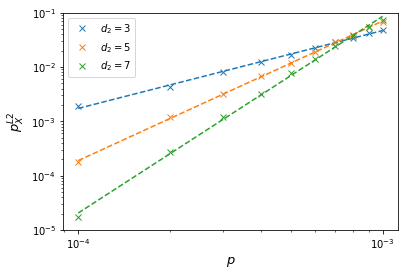

In [75]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]))
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]))
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 0.1)
ax.legend()

In [ ]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], [data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]],marker='v',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]],marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

[2.45075191e-07 1.85217127e-09 1.39979016e-11 1.05790027e-13
 7.99514829e-16 6.04238392e-18]
[1.90011097e-03 1.81878476e-04 1.74093937e-05 1.66642583e-06
 1.59510152e-07 1.52682995e-08]


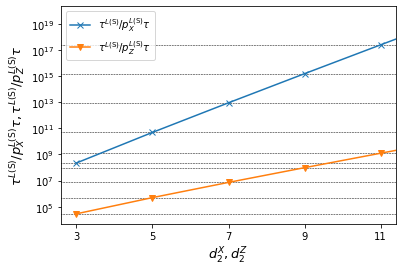

In [88]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_3(0.0001,code_distance_list)[0])
print(pL_Z_3(0.0001,code_distance_list))
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_X_3(0.0001,code_distance_list)[0],marker='x',label=r"$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau$")
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_Z_3(0.0001,code_distance_list),marker='v',label=r"$\tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_X_3(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_Z_3(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$\tau^{LS}/p_{X}^{LS}\tau, \tau^{LS}/p_{Z}^{LS}\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()

[ 65. 117. 169. 221. 393. 485. 577.]
[2.84193927e+04 4.94835903e+05 7.23747201e+06 9.72140477e+07
 9.72140477e+07 1.24130030e+09 1.53258718e+10]


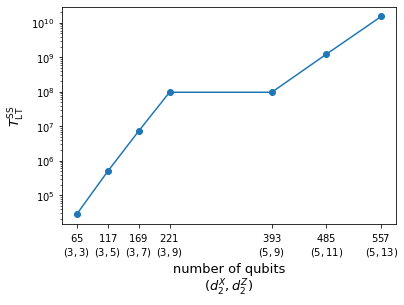

In [85]:
cd_list =[[3,3],[3,5],[3,7],[3,9],[5,9],[5,11],[5,13]]
lifetime_list = np.array([])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list:
    a = (4*3+6)*cd[0] /pL_X_3(0.0001,cd[0])[0]
    b = (4*3+6)*cd[1] /pL_Z_3(0.0001,cd[1])[0]
    lifetime_list = np.append(lifetime_list,min(a,b))
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
print(number_list)
print(lifetime_list)
fig, ax = plt.subplots()
ax.plot(number_list, lifetime_list,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}$', fontsize=13)
ax.set_xticks(number_list)
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",r"$221$"+"\n"+r"$(3,9)$",
                    r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",r"$557$"+"\n"+r"$(5,13)$"])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

[0.00104471] [0.20738354]


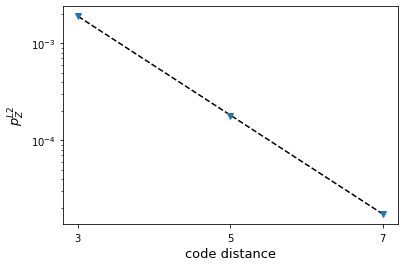

In [75]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index[0:3]
p_list = data2.iloc[:,0][0:3]

# fitting
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = np.array(code_distance_list).reshape(-1, 1)
Y = np.log10(p_list)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
# この式の関数を定義
def pL_Z_5(p,code_distance,p_th=p_th,C=C):
    return C*(p/p_th)**((code_distance+1)/2)

##### グラフ作成 #####
fig, ax = plt.subplots()
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color="k",markersize=8)
ax.plot(code_distance_list,p_list,marker='v',linewidth=0)
ax.set_xlabel(r"code distance", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(code_distance_list)
ax.set_yscale("log")

[[2.27122874e-07 1.70699557e-10 1.28293281e-13 9.64218438e-17
  7.24681127e-20 5.44651207e-23]]


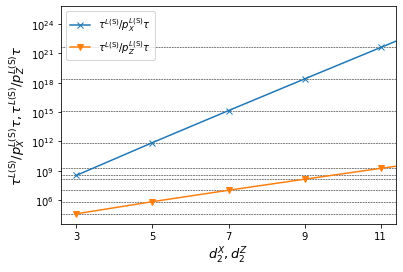

In [86]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_5(0.0001,code_distance_list))
ax.plot(code_distance_list, (4*5+6)*code_distance_list /pL_X_5(0.0001,code_distance_list)[0],marker='x',label=r"$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau$")
ax.plot(code_distance_list, (4*5+6)*code_distance_list /pL_Z_5(0.0001,code_distance_list),marker='v',label=r"$\tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*5+6)*code_distance_list[i] /pL_X_5(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*5+6)*code_distance_list[i] /pL_Z_5(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$\tau^{LS}/p_{X}^{LS}\tau, \tau^{LS}/p_{Z}^{LS}\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()

[ 113.  205.  297.  389.  481.  861. 1025.]
[4.10502339e+04 7.14762971e+05 1.04541262e+07 1.40420291e+08
 3.43426440e+08 1.79298933e+09 2.21373703e+10]


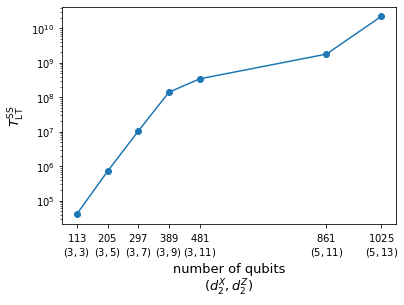

In [396]:
cd_list =[[3,3],[3,5],[3,7],[3,9],[3,11],[5,11],[5,13]]
lifetime_list = np.array([])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list:
    a = (4*5+6)*cd[0] /pL_X_5(0.0001,cd[0])[0,0]
    b = (4*5+6)*cd[1] /pL_Z_5(0.0001,cd[1])[0]
    lifetime_list = np.append(lifetime_list,min(a,b))
    number_list = np.append(number_list,qubits_number(5,cd[0],cd[1]))
print(number_list)
print(lifetime_list)
fig, ax = plt.subplots()
ax.plot(number_list, lifetime_list,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}$', fontsize=13)
ax.set_xticks(number_list)
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",r"$389$"+"\n"+r"$(3,9)$",
                    r"$481$"+"\n"+r"$(3,11)$",r"$861$"+"\n"+r"$(5,11)$",r"$1025$"+"\n"+r"$(5,13)$"])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

[0.00059614] [0.08314032]


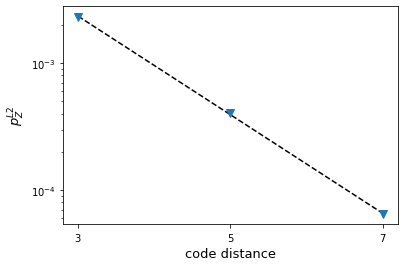

In [49]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index[0:3]
p_list = data2.iloc[:,0][0:3]

# fitting
from sklearn import linear_model
clf = linear_model.LinearRegression()
X = np.array(code_distance_list).reshape(-1, 1)
Y = np.log10(p_list)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
# この式の関数を定義
def pL_Z_7(p,code_distance,p_th=p_th,C=C):
    return C*(p/p_th)**((code_distance+1)/2)

##### グラフ作成 #####
fig, ax = plt.subplots()
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color="k")
ax.plot(code_distance_list,p_list,marker='v',linewidth=0,markersize=8)
ax.set_xlabel(r"code distance", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(code_distance_list)
ax.set_yscale("log")

[[2.43518121e-07 1.31044620e-10 7.05191564e-14 3.79485355e-17
  2.04212787e-20 1.09893207e-23]]


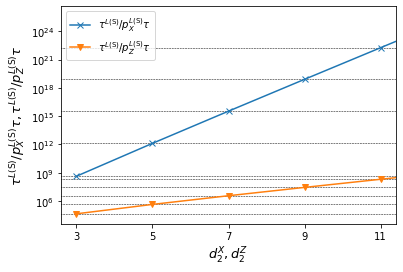

In [87]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_7(0.0001,code_distance_list))
ax.plot(code_distance_list, (4*7+6)*code_distance_list /pL_X_7(0.0001,code_distance_list)[0],marker='x',label=r"$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau$")
ax.plot(code_distance_list, (4*7+6)*code_distance_list /pL_Z_7(0.0001,code_distance_list),marker='v',label=r"$\tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*7+6)*code_distance_list[i] /pL_X_7(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*7+6)*code_distance_list[i] /pL_Z_7(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$\tau^{LS}/p_{X}^{LS}\tau, \tau^{LS}/p_{Z}^{LS}\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()

[ 161.  293.  425.  557.  689.  821. 1473.]
[4.36000633e+04 4.33196741e+05 3.61545140e+06 2.77112623e+07
 2.01909055e+08 4.18860000e+08 1.42251147e+09]


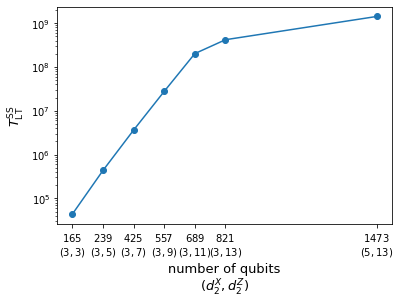

In [389]:
cd_list =[[3,3],[3,5],[3,7],[3,9],[3,11],[3,13],[5,13]]
lifetime_list = np.array([])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list:
    a = (4*7+6)*cd[0] /pL_X_7(0.0001,cd[0])[0,0]
    b = (4*7+6)*cd[1] /pL_Z_7(0.0001,cd[1])[0]
    lifetime_list = np.append(lifetime_list,min(a,b))
    number_list = np.append(number_list,qubits_number(7,cd[0],cd[1]))
print(number_list)
print(lifetime_list)
fig, ax = plt.subplots()
ax.plot(number_list, lifetime_list,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}$', fontsize=13)
ax.set_xticks(number_list)
ax.set_xticklabels([r"$161$"+"\n"+r"$(3,3)$",r"$293$"+"\n"+r"$(3,5)$",r"$425$"+"\n"+r"$(3,7)$",r"$557$"+"\n"+r"$(3,9)$",
                    r"$689$"+"\n"+r"$(3,11)$",r"$821$"+"\n"+r"$(3,13)$",r"$1473$"+"\n"+r"$(5,13)$"])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

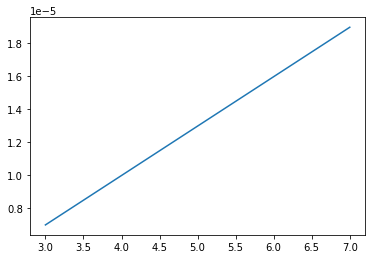

In [380]:
def pg_Z(p,eta,cd_rep):
    return 1/2 * (1-(1-2*p*(2*eta+1)/(2*(eta+1)))**(3*cd_rep-2))
def pg_X(p,eta,cd_rep):
    return 1/2 * (1-(1-2*p/(eta+1))**(3*cd_rep-2))
def p_matrix(p,eta,round_rep,cd_rep):
    matrix = []
    ### 反復符号(なし)
    matrix.append(10e-20) #pL_x(反復符号はゼロ)
    matrix.append(10e-20) #pL_z(反復符号はゼロ)
    ### Zシンドローム測定
    matrix.append(2 * p / (eta+1)) # pg_c_x
    matrix.append(pg_Z(p,eta,cd_rep)) # pg_c_z
    matrix.append(cd_rep*p/(eta+1)) # pg_t_x
    matrix.append((2*eta+1)*p/(2*(eta+1))) #pg_t_z
    ### Xシンドローム測定
    matrix.append(pg_X(p,eta,cd_rep)) # pg_c_x
    matrix.append(2*(2*eta+1)*p/(2*(eta+1))) # pg_c_z
    matrix.append(p/(eta+1)) # pg_t_x
    matrix.append(cd_rep*(2*eta+1)*p/(2*(eta+1))) #pg_t_z
    ### ただのエラー
    matrix.append(1/(eta+1)*p) # p_x
    matrix.append((2*eta+1)/(2*(eta+1))*p) # p_z
    return matrix

p = 0.001
eta = 1000
cd_rep_list = [3,5,7]
p_list = []
for cd_rep in cd_rep_list:
    p_list.append(pg_X(p,eta,cd_rep))
plt.plot(cd_rep_list, p_list)